<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/ml-farhan/Optiver_Trading_at_the_close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data import

In [5]:
import os.path
import json

api_token = {"username":"farhanarrafi","key":"61bc5393e4e8ca012a38d9d345c7362b"}

if not os.path.isdir('/root/.kaggle'):
  ! mkdir ~/.kaggle
  ! touch ~/.kaggle/kaggle.json
  with open('/root/.kaggle/kaggle.json', 'w') as file:
      json.dump(api_token, file)
  !chmod 600 ~/.kaggle/kaggle.json

In [6]:

if not os.path.isfile('train.csv'):
  ! kaggle competitions download -c 'optiver-trading-at-the-close'
  ! unzip optiver-trading-at-the-close.zip
  ! rm -rf optiver-trading-at-the-close.zip

 98% 197M/201M [00:00<00:00, 278MB/s]
100% 201M/201M [00:00<00:00, 276MB/s]
Archive:  optiver-trading-at-the-close.zip
  inflating: example_test_files/revealed_targets.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/test.csv  
  inflating: optiver2023/__init__.py  
  inflating: optiver2023/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: public_timeseries_testing_util.py  
  inflating: train.csv               


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [8]:
train_dataset = pd.read_csv('train.csv')

In [9]:
train_dataset_row_17 = train_dataset[train_dataset['stock_id'] == 17]
train_dataset_row_17.head(10)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
17,17,0,0,12411362.37,-1,1.000966,27288881.25,NaN,NaN,0.999028,12438.00,1.000648,8305.44,1.000000,-3.589988,0,0_0_17
208,17,0,10,11225144.89,-1,1.000445,28475098.73,NaN,NaN,1.000272,691.86,1.001053,3462.00,1.000402,-13.880134,1,0_10_17
399,17,0,20,11225144.89,-1,1.000445,28475098.73,NaN,NaN,1.000330,37708.55,1.001053,3462.00,1.000992,-16.229748,2,0_20_17
590,17,0,30,11225144.89,-1,1.000387,28475098.73,NaN,NaN,1.000359,7265.16,1.000995,7269.78,1.000677,-11.889935,3,0_30_17
781,17,0,40,11360712.60,-1,1.000734,28491353.02,NaN,NaN,1.000503,6574.19,1.001053,3462.00,1.000863,-15.770197,4,0_40_17
972,17,0,50,11328204.02,-1,1.000445,28523861.61,NaN,NaN,1.000359,691.92,1.000763,35302.20,1.000366,-10.740161,5,0_50_17
1163,17,0,60,11328204.02,-1,1.000359,28523861.61,NaN,NaN,1.000330,22832.70,1.000763,52261.10,1.000462,-10.920167,6,0_60_17
1354,17,0,70,11182607.06,-1,0.999549,28669458.56,NaN,NaN,0.999491,345.66,1.000359,23525.28,0.999504,4.689693,7,0_70_17
1545,17,0,80,11193327.98,-1,0.999347,28669458.56,NaN,NaN,0.999028,14165.50,0.999896,41150.20,0.999251,3.169775,8,0_80_17
1736,17,0,90,11169119.46,-1,0.998826,28693667.08,NaN,NaN,0.998768,22451.65,0.999433,6567.16,0.999283,-1.320243,9,0_90_17


# Data Preprocessing

In [12]:
train = train_dataset_row_17.drop(axis='columns', columns=['stock_id', 'date_id','seconds_in_bucket','imbalance_size','imbalance_buy_sell_flag', 'reference_price','matched_size','far_price', 'near_price','bid_price','bid_size','ask_price','ask_size','wap','row_id'])
train.head()
train = train.set_index('time_id')
train.head()

,target
time_id,
0,-3.589988
1,-13.880134
2,-16.229748
3,-11.889935
4,-15.770197


In [13]:
standard_deviation = train['target'].std()
standard_deviation

8.592792472682557

In [14]:
mean = train['target'].mean()
mean

0.06302402054991493

In [15]:
max = train['target'].max()
max

81.29001

In [16]:
min = train['target'].min()

<Axes: >

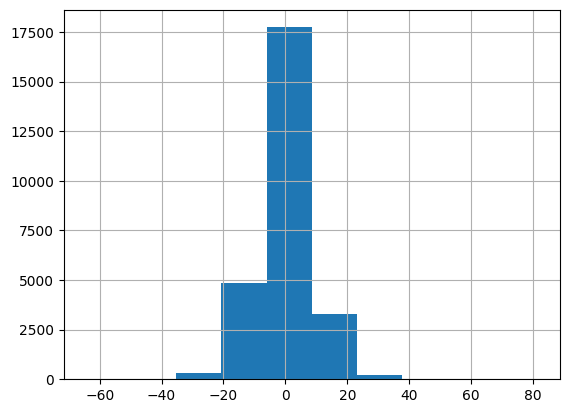

In [17]:

train['target'].hist()

In [18]:
# train_with_positive_outlier = train[train['target'] >= (mean + standard_deviation*3)]
# train_with_negative_outlier = train[train['target'] <= (mean + standard_deviation*3)]
# train_without_outlier = train - train_with_positive_outlier
# train_without_outlier = train - train_with_negative_outlier
# train_without_outlier['target'].hist()

In [19]:
train.tail(5)

,target
time_id,
26450,2.239943
26451,0.519752
26452,3.570318
26453,5.029440
26454,-2.920031


# Visualisation

<Axes: title={'center': 'Plot of target value of Stock 17 for the first 1 minute'}, xlabel='Time in 10 seconds interval', ylabel='Target value of stock'>

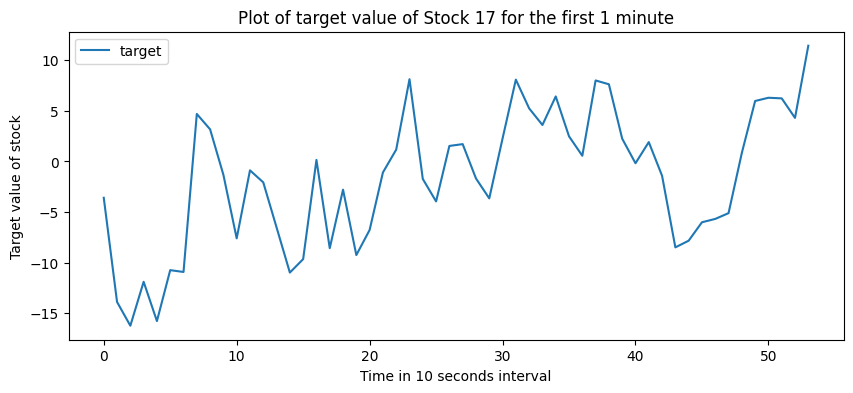

In [26]:
train[0:54].plot(xlabel='Time in 10 seconds interval', ylabel='Target value of stock', figsize=(10,4), title='Plot of target value of Stock 17 for the first 1 minute')

# Trend Extracting (Moving Average)

In [27]:
moving_average = train.rolling(window=5).mean()

<Axes: xlabel='time_id'>

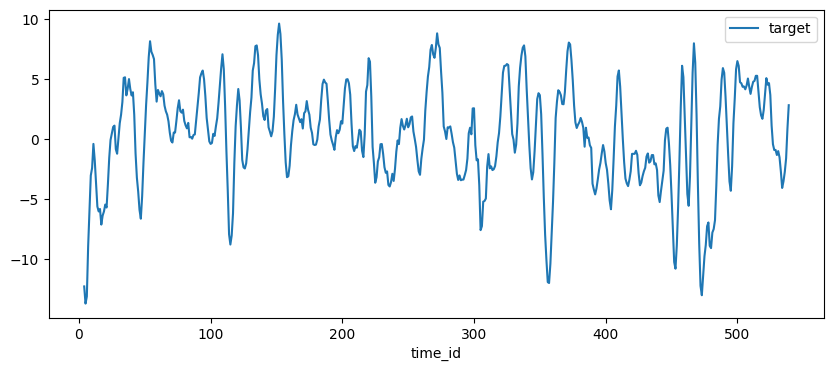

In [28]:
moving_average[0:540].plot(figsize=(10,4))

## Simple Moving Average

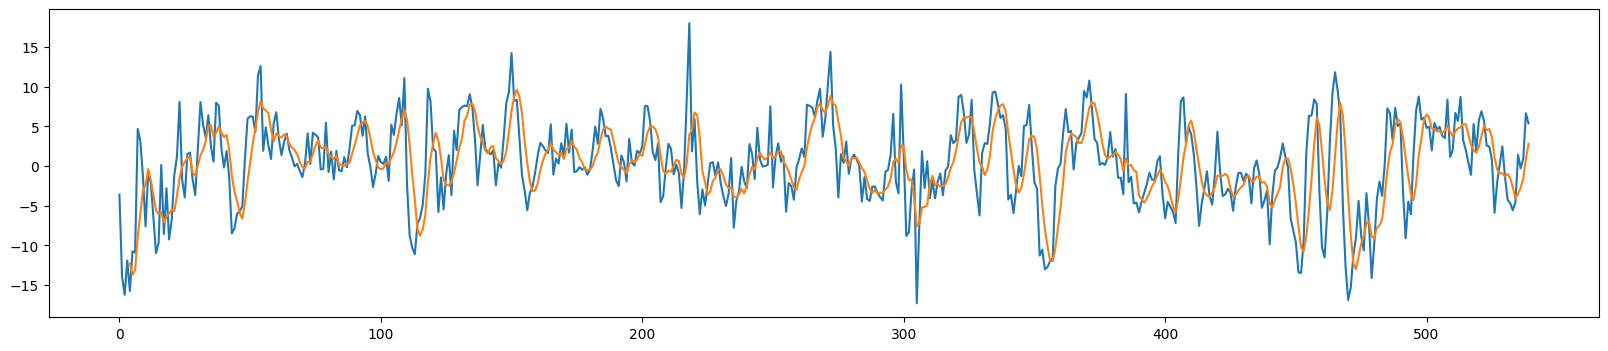

In [29]:
import matplotlib.pyplot as plt


y1 = train['target']
y2 = moving_average

plt.figure(figsize=(20,4))
plt.plot(y1[0:540])
plt.plot(y2[0:540])
plt.show()


## Weighted Moving Average

In [30]:
weights = [0.1,0.2,0.3,0.4]
weighted_moving_average = train['target'].rolling(4).apply(lambda x: sum(weights*x) / sum(weights), raw=True)

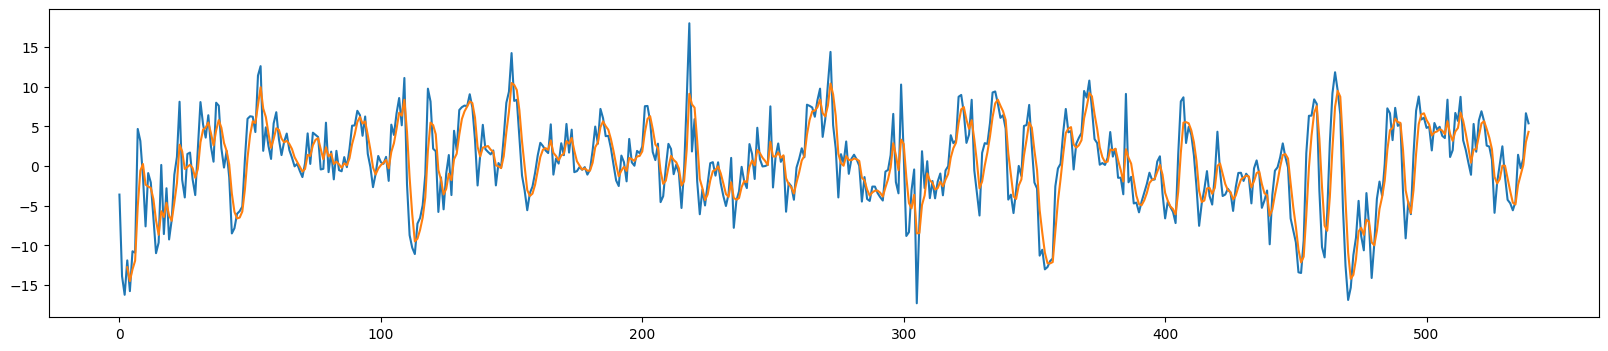

In [32]:

y1 = train['target']
y2 = weighted_moving_average

plt.figure(figsize=(20,4))
plt.plot(y1[0:540])
plt.plot(y2[0:540])
plt.show()

In [33]:
## Exponential Smoothing (Exponential Moving Average)

In [34]:
exponential_smoothing_1 = train.ewm(span=4, adjust=False).mean()
exponential_smoothing_2 = exponential_smoothing_1.ewm(span=4, adjust=False).mean()
exponential_smoothing_3 = exponential_smoothing_2.ewm(span=4, adjust=False).mean()

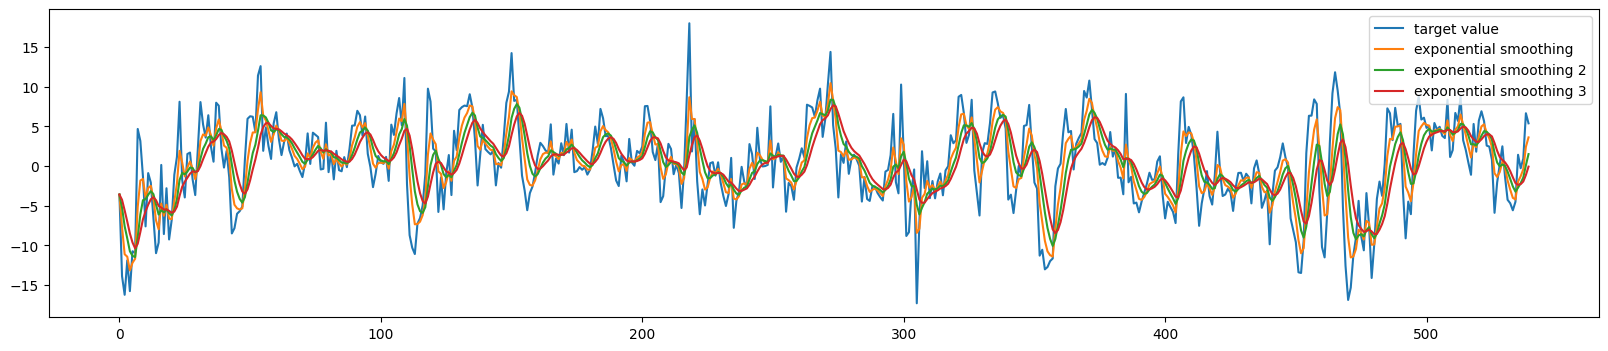

In [35]:

y1 = train
y2 = exponential_smoothing_1
y3 = exponential_smoothing_2
y4 = exponential_smoothing_3

start = 0
end = 540

plt.figure(figsize=(20,4))
plt.plot(y1[start:end], label = 'target value')
plt.plot(y2[start:end], label='exponential smoothing')
plt.plot(y3[start:end], label='exponential smoothing 2')
plt.plot(y4[start:end], label='exponential smoothing 3')
plt.legend()
plt.show()

# De-Trending the time series

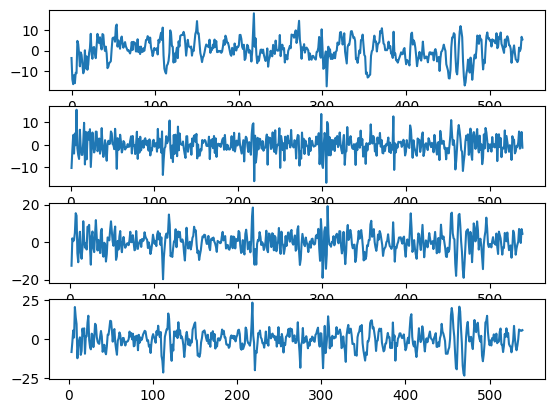

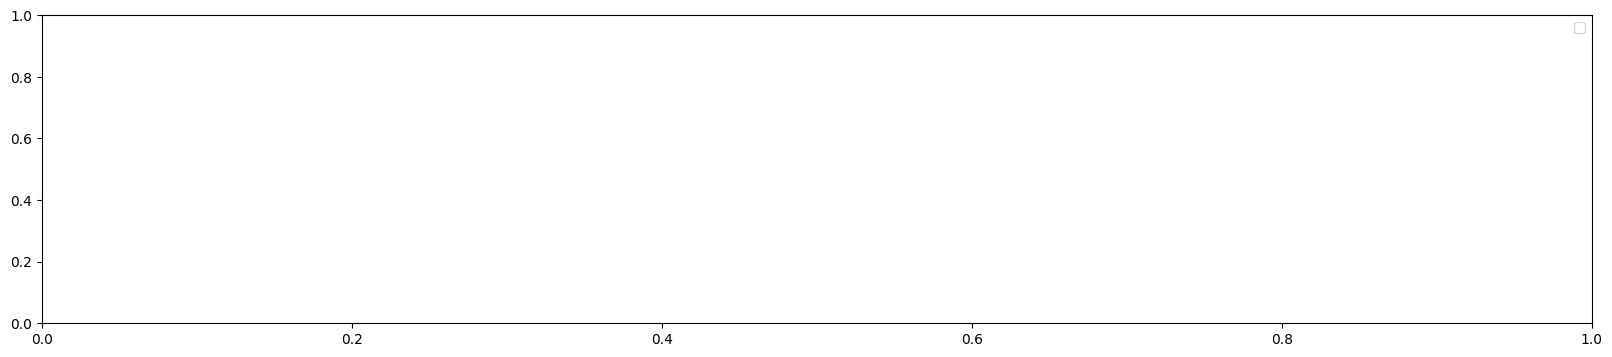

In [62]:
y1 = train
y2 = train.diff(1)
y3 = train.diff(2)
y4 = train.diff(3)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)

plt.figure(figsize=(20,4))
ax1.plot(y1[start:end], label='target value')
ax2.plot(y2[start:end], label='1 Differenced')
ax3.plot(y3[start:end], label='2 Differenced')
ax4.plot(y4[start:end], label='3 Differenced')
plt.legend()
plt.show()

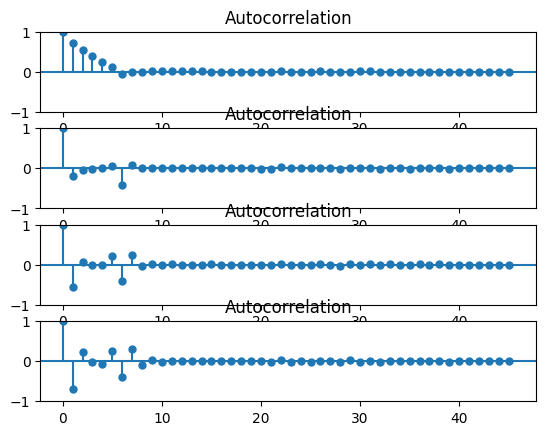

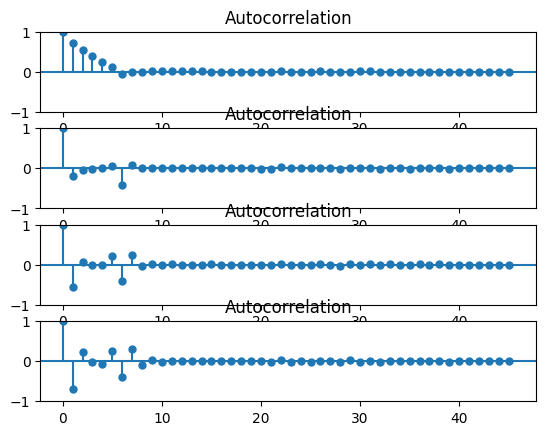

In [63]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
plot_acf(train, ax=ax1)
plot_acf(train.diff().dropna(), ax=ax2)
plot_acf(train.diff().diff().dropna(), ax=ax3)
plot_acf(train.diff().diff().diff().dropna(), ax=ax4)

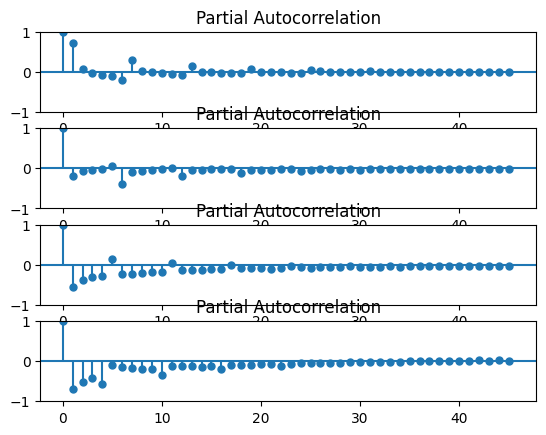

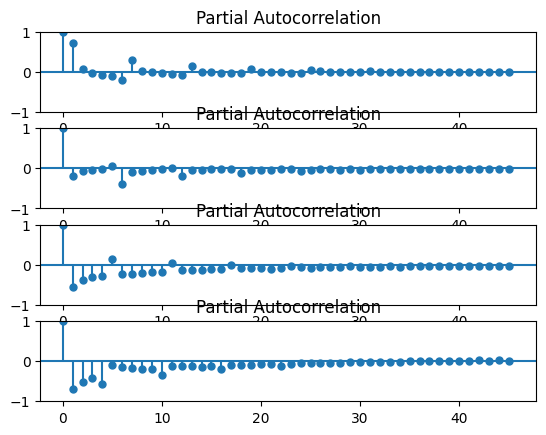

In [64]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
plot_pacf(train, ax=ax1)
plot_pacf(train.diff().dropna(), ax=ax2)
plot_pacf(train.diff().diff().dropna(), ax=ax3)
plot_pacf(train.diff().diff().diff().dropna(), ax=ax4)

In [36]:
detrended_target1 = train - exponential_smoothing_1
detrended_target2 = train - exponential_smoothing_2
detrended_target3 = train - exponential_smoothing_3

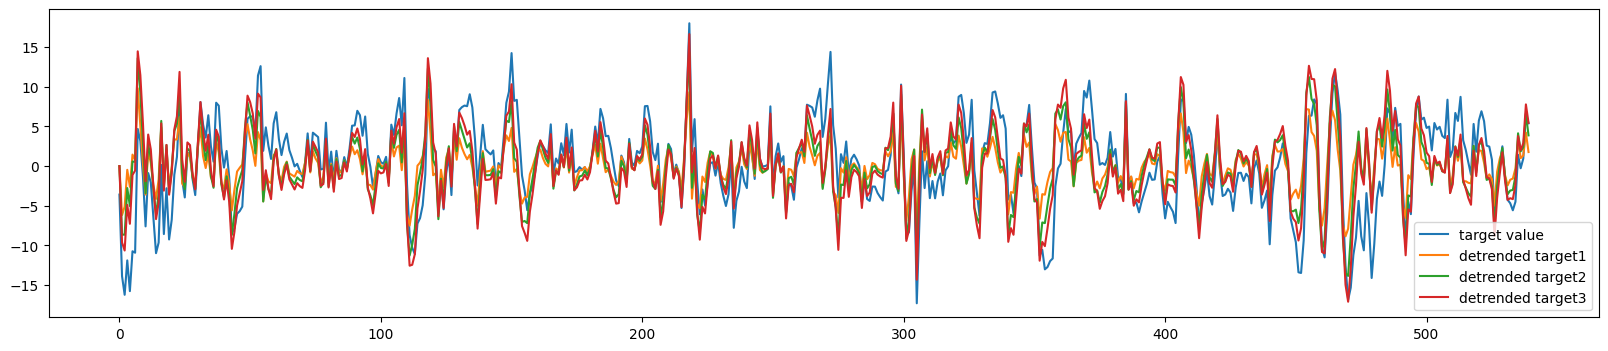

In [37]:

y1 = train
y2 = detrended_target1
y3 = detrended_target2
y4 = detrended_target3

plt.figure(figsize=(20,4))
plt.plot(y1[start:end], label='target value')
plt.plot(y2[start:end], label='detrended target1')
plt.plot(y3[start:end], label='detrended target2')
plt.plot(y4[start:end], label='detrended target3')
plt.legend()
plt.show()

# plt.figure(figsize=(20,4))
# plt.plot(x[541:1080],y2[541:1080], label='detrended target')
# plt.legend()
# plt.show()

# Testing for stationary

In [38]:
from statsmodels.tsa.stattools import adfuller

start=0
end=540

lag= 48
regression = 'c'

adfuller_es = adfuller(train[start:end], maxlag=lag, autolag=None, regression=regression)

adfuller_es1 = adfuller(exponential_smoothing_1[start:end], maxlag=lag, autolag=None, regression=regression)
adfuller_es2 = adfuller(exponential_smoothing_2[start:end], maxlag=lag, autolag=None, regression=regression)
adfuller_es3 = adfuller(exponential_smoothing_3[start:end], maxlag=lag, autolag=None, regression=regression)


labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used']

def parseAdfResult(adfResult):
  for value, label in zip(adfResult, labels):
    print(label+' : '+str(value))
  if adfResult[1] <= 0.05:
    print('Data is stationary')
  else:
    print('Data is non stationary.')


print(parseAdfResult(adfuller_es))

print(parseAdfResult(adfuller_es1))
print(parseAdfResult(adfuller_es2))
print(parseAdfResult(adfuller_es3))

ADF test statistics : -2.9353360620251308
P-value : 0.04139050493021693
#Lags used : 48
Number of observation used : 491
Data is stationary
None
ADF test statistics : -2.832318875999926
P-value : 0.05380348180932062
#Lags used : 48
Number of observation used : 491
Data is non stationary.
None
ADF test statistics : -2.697314344950426
P-value : 0.07450415877804502
#Lags used : 48
Number of observation used : 491
Data is non stationary.
None
ADF test statistics : -2.631044631304367
P-value : 0.08674920429782101
#Lags used : 48
Number of observation used : 491
Data is non stationary.
None


# ADF and KPSS Test comparison
  Reference: https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

In [39]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    #dftest = adfuller(timeseries, autolag="AIC")
    dftest = adfuller(timeseries, maxlag=lag, autolag=None)
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

print(adf_test(train[start:end]))
print(adf_test(exponential_smoothing_1[start:end]))
print(adf_test(exponential_smoothing_2[start:end]))
print(adf_test(exponential_smoothing_3[start:end]))

Results of Dickey-Fuller Test:
Test Statistic                  -2.935336
p-value                          0.041391
#Lags Used                      48.000000
Number of Observations Used    491.000000
Critical Value (1%)             -3.443739
Critical Value (5%)             -2.867444
Critical Value (10%)            -2.569915
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                  -2.832319
p-value                          0.053803
#Lags Used                      48.000000
Number of Observations Used    491.000000
Critical Value (1%)             -3.443739
Critical Value (5%)             -2.867444
Critical Value (10%)            -2.569915
dtype: float64
None
Results of Dickey-Fuller Test:
Test Statistic                  -2.697314
p-value                          0.074504
#Lags Used                      48.000000
Number of Observations Used    491.000000
Critical Value (1%)             -3.443739
Critical Value (5%)             -2.867444
Critical Value (10%)       

In [40]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

print(kpss_test(train[start:end]))
print(kpss_test(exponential_smoothing_1[start:end]))
print(kpss_test(exponential_smoothing_2[start:end]))
print(kpss_test(exponential_smoothing_3[start:end]))

Results of KPSS Test:
Test Statistic            0.196478
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None
Results of KPSS Test:
Test Statistic            0.205608
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None
Results of KPSS Test:
Test Statistic            0.207291
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None
Results of KPSS Test:
Test Statistic            0.204542
p-value                   0.100000
Lags Used                15.000000
Critical Val

<ipython-input-40-2ccf5f5f71ca>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
<ipython-input-40-2ccf5f5f71ca>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
<ipython-input-40-2ccf5f5f71ca>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
<ipython-input-40-2ccf5f5f71ca>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest =

# Finding P, Q and D Values for ARIMA

https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

## ACF for finding Q value

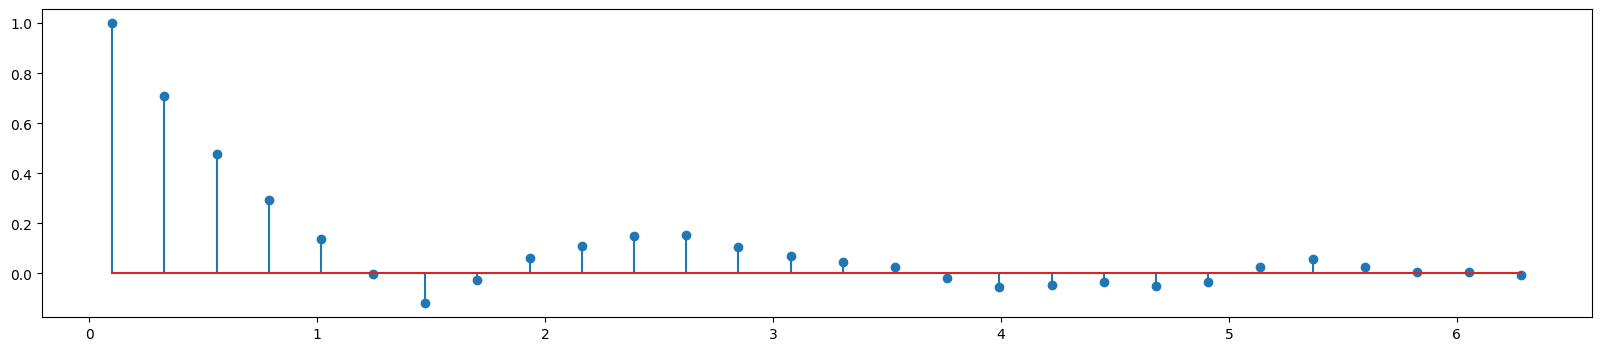

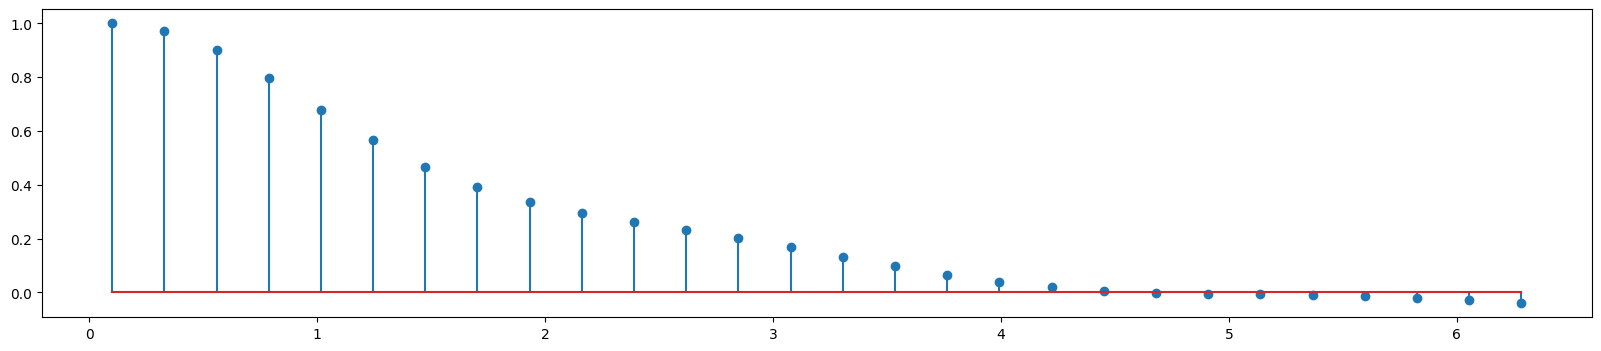

In [56]:
from statsmodels.tsa.stattools import acf

acf_train = acf(train[start:end])
acf_exp1 = acf(exponential_smoothing_3[start:end])

x = np.linspace(0.1, 2 * np.pi, len(acf_train))
y1 = acf_train
y2 = acf_exp1

plt.figure(figsize=(20,4))
plt.stem(x, y1)
plt.show()

plt.figure(figsize=(20,4))
plt.stem(x, y2)
plt.show()


## PACF for finding P value
We ignore lag 1.

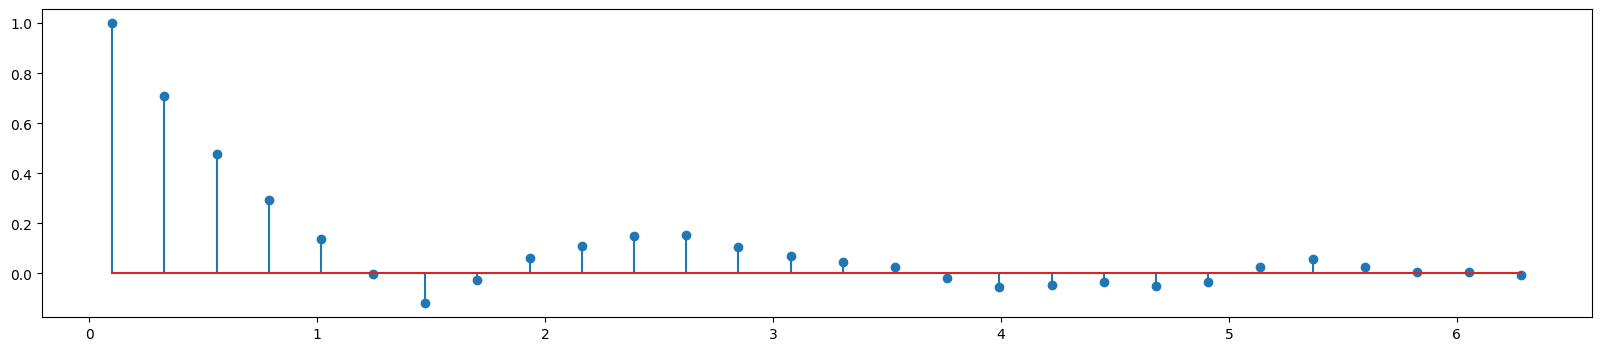

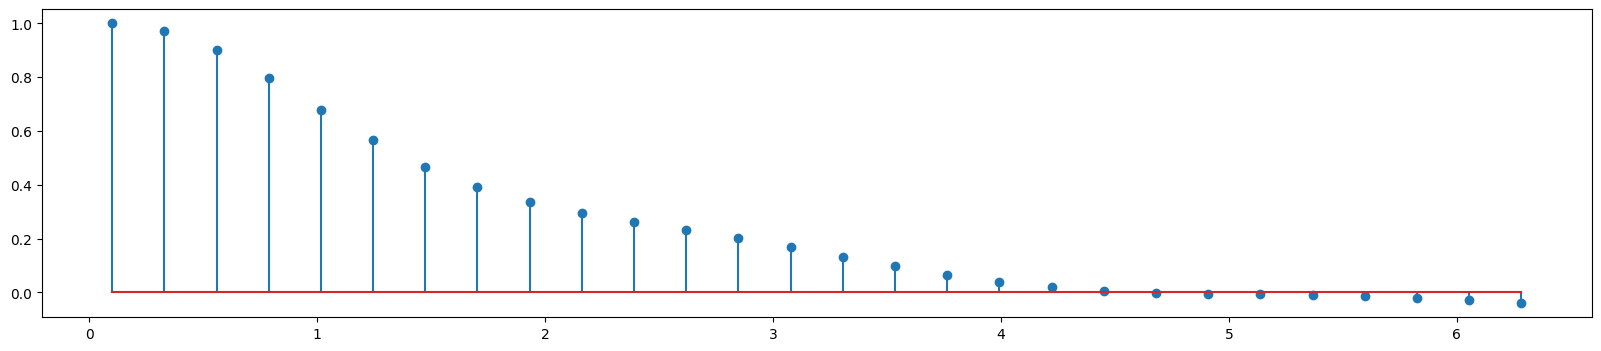

In [57]:
from statsmodels.tsa.stattools import pacf

pacf_train = acf(train[start:end])
pacf_exp1 = acf(exponential_smoothing_3[start:end])

x = np.linspace(0.1, 2 * np.pi, len(pacf_train))
y1 = pacf_train
y2 = pacf_exp1

plt.figure(figsize=(20,4))
plt.stem(x, y1)
plt.show()

plt.figure(figsize=(20,4))
plt.stem(x, y2)
plt.show()

# ARIMA (Auto Regression Integrated Moving Average

In [58]:
from statsmodels.tsa.arima.model import ARIMA

arima_train = ARIMA(train[start:end], order=(4, 1, 5)).fit()
arima_exp1 = ARIMA(exponential_smoothing_3[start:end], order=(18, 1, 19)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
# print(arima_train.summary())
print(arima_train.params)

ar.L1      0.964887
ar.L2     -0.872716
ar.L3      0.525069
ar.L4     -0.356461
ma.L1     -1.280085
ma.L2      1.098026
ma.L3     -0.946061
ma.L4      0.713424
ma.L5     -0.544516
sigma2    13.185569
dtype: float64


In [60]:
# print(arima_exp1.summary())
print(arima_exp1.params)

ar.L1     1.431572
ar.L2    -0.604153
ar.L3    -0.021813
ar.L4     0.146894
ar.L5    -0.478764
ar.L6     0.119644
ar.L7     0.402954
ar.L8    -0.000646
ar.L9    -0.346010
ar.L10   -0.037564
ar.L11    0.047111
ar.L12    0.135499
ar.L13    0.083271
ar.L14   -0.125308
ar.L15    0.115880
ar.L16   -0.199750
ar.L17    0.120930
ar.L18    0.005267
ma.L1     0.095328
ma.L2    -0.031304
ma.L3    -0.062496
ma.L4    -0.172283
ma.L5     0.238743
ma.L6    -0.011270
ma.L7    -0.097602
ma.L8    -0.321076
ma.L9    -0.114077
ma.L10    0.258896
ma.L11    0.178850
ma.L12   -0.184611
ma.L13   -0.213519
ma.L14   -0.062486
ma.L15   -0.129416
ma.L16   -0.053184
ma.L17   -0.180960
ma.L18   -0.106062
ma.L19    0.010903
sigma2    0.049220
dtype: float64


# Testing

In [ ]:
import optiver2023
env = optiver2023.make_env()
iter_test = env.iter_test()

# References:


1.   [Testing code source](https://www.kaggle.com/code/jirkaborovec/optiver-eda-pytorch-models)
2.   [Moving Average source](https://medium.com/@HalderNilimesh/applied-data-science-for-beginners-how-to-calculate-moving-average-using-pandas-dataframe-in-7e5f7944c07a)

